
# Projet d'économétrie

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from scipy.stats import f


In [2]:
def OLS(df, variables_explicatives, variable_cible, centrer_reduire=False):
    
    X = df[variables_explicatives]
    X = np.zeros((X.shape[0], X.shape[1]+1))
    X[:,0] = 1
    X[:,1:] = df.ix[:, variables_explicatives]
    
    if centrer_reduire:
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

    y = df[variable_cible]
    beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    y_pred = np.dot(X, beta)
    return (beta, y_pred, y-y_pred, X)

def afficher_var(variables, beta):
    variables = ["constante"]+variables
    for i, item in enumerate(beta):
        print(item, variables[i])

### 1.	Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [3]:
names = [
    'inlf',                    # =1 if in labor force, 1975
    'hours',                   # hours worked, 1975
    'kidslt6',                 # #kids < 6 years
    'kidsge6',                 # #kids 6-18
    'age',                     # woman's age in yrs
    'educ',                    # years of schooling
    'wage',                    # estimated wage from earns., hours
    'repwage',                 # reported wage at interview in 1976
    'hushrs',                  # hours worked by husband, 1975
    'husage',                  # husband's age
    'huseduc',                 # husband's years of schooling
    'huswage',                 # husband's hourly wage, 1975
    'faminc',                  # family income, 1975
    'mtr',                     # fed. marginal tax rate facing woman
    'motheduc',                # mother's years of schooling
    'fatheduc',                # father's years of schooling
    'unem',                    # unem. rate in county of resid.
    'city',                    # =1 if live in SMSA
    'exper',                   # actual labor mkt exper
    'nwifeinc',                # (faminc - wage*hours)/1000
    'lwage',                   # log(wage)
    'expersq',                 # exper^2
]

df = pd.read_csv('swbook1_3e\\textfiles\MROZ.raw', sep='\s+', names=names)
df = df.convert_objects(convert_numeric=True)

df = df[df["wage"]>0]

C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation  pour l’ensemble des femmes

In [4]:
df[["wage", "age", "educ"]].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


### Salaire du mari supérieur à la médiane de l'échantillon

In [5]:
df[df["huswage"]>df["huswage"].median()][["wage", "age", "educ"]].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,4.896822,42.275701,13.242991
std,4.041606,7.388843,2.359045
min,0.161600,30.000000,5.000000
25%,2.513850,36.000000,12.000000
50%,3.846400,43.000000,12.000000
75%,5.854125,48.000000,16.000000
max,25.000000,59.000000,17.000000


### Salaire du mari inférieur à la médiane de l'échantillon

In [6]:
df[df["huswage"]<df["huswage"].median()][["wage", "age", "educ"]].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,3.458541,41.668224,12.074766
std,2.143274,8.045482,2.054200
min,0.128200,30.000000,6.000000
25%,2.117275,35.000000,12.000000
50%,2.971800,41.000000,12.000000
75%,4.393800,47.000000,12.000000
max,18.267000,60.000000,17.000000


### 3. 

C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


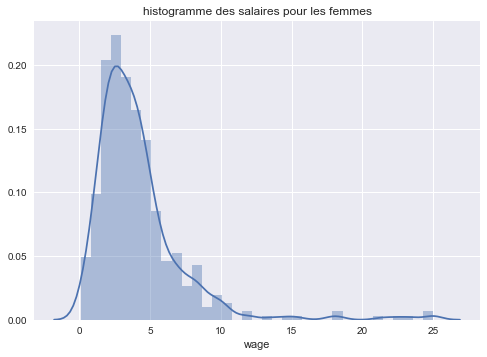

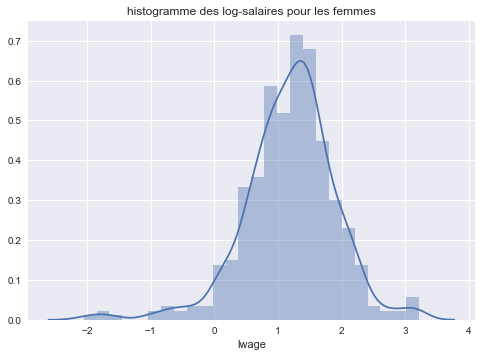

In [7]:
sns.distplot(df["wage"])
plt.title("histogramme des salaires pour les femmes")
plt.show()
sns.distplot(df["lwage"])
plt.title("histogramme des log-salaires pour les femmes")
plt.show()

### 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [8]:
from scipy.stats import spearmanr

print(np.corrcoef(df["motheduc"], df["fatheduc"]))
spearmanr(df["motheduc"], df["fatheduc"])

[[ 1.          0.55406322]
 [ 0.55406322  1.        ]]


SpearmanrResult(correlation=0.55073278223958799, pvalue=2.5800056955164742e-35)

### 5.

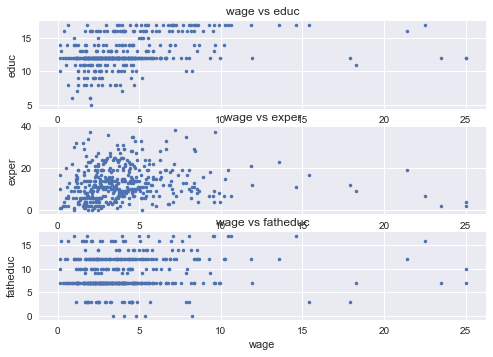

In [9]:
fx, axarr = plt.subplots(3, 1)
axarr[0].plot(df["wage"], df["educ"], '.')
axarr[0].set_title('wage vs educ')
axarr[0].set_xlabel("wage")
axarr[0].set_ylabel("educ")

axarr[1].plot(df["wage"], df["exper"], '.')
axarr[1].set_title('wage vs exper')
axarr[1].set_xlabel("wage")
axarr[1].set_ylabel("exper")

axarr[2].plot(df["wage"], df["fatheduc"], '.')
axarr[2].set_title('wage vs fatheduc')
axarr[2].set_xlabel("wage")
axarr[2].set_ylabel("fatheduc")



plt.show()

### 6. Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le biais de variable omise

C'est la non-corrélation entre les variables explicatives et l'erreur. L'hypothèse permet de s'assurer d'avoir un estimateur sans biais : 

Hyputhèse : 
$$ E(X'u)=0 $$
$$ E(\hat{\beta}) = E(\beta) + (x'x)^{-1} E(X'u)$$

Si l'hypothèse n'est pas respectée
$$E(\hat{\beta}) \ne E(\beta)$$
Donc estimateur biaisé

### 7.	Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. 

In [10]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
beta_wage, y_pred_wage, res_wage, X_wage = OLS(df, variables_explicatives=variables, variable_cible="wage")

In [11]:
afficher_var(variables=variables, beta=beta_wage)

-2.40345399155 constante
0.369752029505 city
0.460047701259 educ
0.0238199479511 exper
0.0152447935763 nwifeinc
0.0361731913893 kidslt6
-0.0618909096857 kidsge6


C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


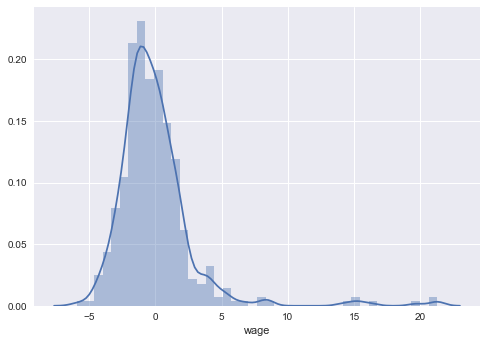

In [12]:
sns.distplot(res_wage)
plt.show()

Les résidus ne semblent pas suivre une loi normale centrée. On ne respecte pas les hypothèses du MCO.

In [13]:
from scipy.stats import normaltest
normaltest(res_wage)

NormaltestResult(statistic=345.82470863763109, pvalue=8.0374570731789066e-76)

### 8.	Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7.

In [14]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]

beta_lwage, y_pred_lwage, res_lwage, X_lwage = OLS(df, variables_explicatives=variables, variable_cible="lwage")

In [15]:
afficher_var(variables, beta_lwage)

-0.398975226675 constante
0.0352678929323 city
0.10224754784 educ
0.0154878720958 exper
0.00488269568156 nwifeinc
-0.0453028703817 kidslt6
-0.0117035067044 kidsge6


C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


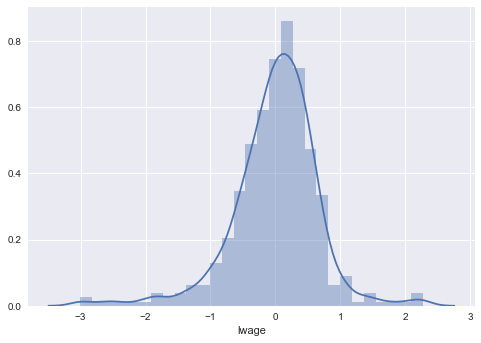

In [16]:
sns.distplot(res_lwage)
plt.show()

In [17]:
from scipy.stats import normaltest
normaltest(res_lwage)

NormaltestResult(statistic=79.542467346437235, pvalue=5.3403863507048367e-18)

L'hypothèse nulle de normalité des résidus est rejetée au risque 5%.

### 9.	Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [29]:
ddl = (X_lwage.shape[0] - X_lwage.shape[1])
sig2 = np.dot(res_lwage.T, res_lwage) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X_lwage.T, X_lwage)))) 
t_exper = beta_lwage[3]/std[3]
print(t_exper)

3.45171828081


In [30]:
p_val = 2*t.sf(np.abs(t_exper), ddl)
print("p_value : ", p_val)

p_value :  0.000613365079014


In [31]:
t_student1 = t.ppf(1-0.01/2,df=df.shape[0]-7)
print("quantile de Student à 1% : ", t_student1)
t_student5 = t.ppf(1-0.05/2,df=df.shape[0]-7)
print("quantile de Student à 5% : ", t_student5)
t_student10 = t.ppf(1-0.1/2,df=df.shape[0]-7)
print("quantile de Student à 10% : ", t_student10)

quantile de Student à 1% :  2.58755757305
quantile de Student à 5% :  1.96561479201
quantile de Student à 10% :  1.64848105713


Les quantiles de student sont tous inférieurs à la statistique de test. On rejète pour les troix tests l'hypothèse nulle $H_0 : B_{exper} = 0$ 

### 10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)

In [32]:
t_educ = beta_lwage[2]/std[2]
p_val = 2*t.sf(np.abs(t_educ), ddl)
print(t_educ)
print("p_value : ", p_val)
t_student5 = t.ppf(1-0.05/2,df=df.shape[0]-7)
print("Statistique de test à 5% : ", t_student5)

6.77056178537
p_value :  4.32452637615e-11
Statistique de test à 5% :  1.96561479201


### 11.	Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%.

In [33]:
variables = ["city", "nwifeinc", "kidslt6", "kidsge6"]
X_2 = df[variables]
X_2 = np.zeros((X_2.shape[0], X_2.shape[1]+1))
print(np.shape(X_2))
X_2[:,0] = 1
X_2[:,1:] = df.ix[:, variables]
y_lwage_2 = df["lwage"]
beta_lwage_2 = np.dot(np.linalg.inv(np.dot(X_2.T, X_2)), np.dot(X_2.T, y_lwage_2))

beta_lwage_2, y_pred_wage, res_lwage_2, X_wage = OLS(df, variables_explicatives=variables, variable_cible="wage")

(428, 5)


In [34]:
y_pred_lwage_2 = np.dot(X_2, beta_lwage_2)
res_lwage_2 = y_pred_lwage_2 - y_lwage_2

In [35]:
SSR1 = np.dot(res_lwage.T, res_lwage)
SSR0 = np.dot(res_lwage_2.T, res_lwage_2)

ddl0 = X_lwage.shape[0]-X_lwage.shape[1]
ddl1 = X_2.shape[0]-X_2.shape[1]

F = ((SSR0 - SSR1)/SSR1) * (ddl0 / (ddl1 - ddl0))

In [37]:
print("p-value")
f.sf(F, 2, X_lwage.shape[0]-7)

p-value


4.7233874676712871e-283

In [38]:
f.ppf(0.95,2,df.shape[0]-7)

3.0171506509713275

On rejette ainsi au risque 5%, l'hypothèse nulle. Selon le test, les deux coefficients sont significatifs.

### 12.	De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

In [102]:
print("Avec 10 année d'expérience, le salaire augmentera, selon le modèle, \
de ", np.round(beta_lwage[3]*10*100, 2))

Avec 10 année d'expérience, le salaire augmentera, selon le modèle, de  15.49


### 13.	Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

In [45]:
y = df["lwage"].as_matrix()
X = np.zeros((df.shape[0],7))
X[:,0] = 1
df_modify = df.ix[:, ["city","educ","exper","nwifeinc","kidslt6","kidsge6"]]
df_modify["tot_kids"] = df["kidslt6"] + df["kidsge6"]
X[:,1:] = df_modify.ix[:, ["city","educ","exper","nwifeinc","tot_kids", "kidslt6"]]

In [46]:
coef = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
list(map(lambda x: print(x),
    zip(["constante","city","educ","exper","nwifeinc","tot_kids", "kidslt6"], coef)))

('constante', -0.39897522667496688)
('city', 0.035267892932327793)
('educ', 0.10224754784018658)
('exper', 0.015487872095843347)
('nwifeinc', 0.0048826956815640173)
('tot_kids', -0.011703506704368927)
('kidslt6', -0.033599363677317307)


[None, None, None, None, None, None, None]

In [53]:
beta_totkids = coef[6]
y_pred = coef[0] + np.dot(X[:,1:], coef[1:])
res = y_pred - y
sig2 = np.dot(res.T,res) / (df.shape[0]-7)
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T,X))))

In [54]:
t_totkids = beta_totkids/ std[6]
print("Statistique de test : ", t_totkids)
p_val =  2.0 * (1.0 - t.cdf(np.abs(t_totkids), df.shape[0]-7))
print("P-value : ", p_val)

Statistique de test :  -0.37174737908
P-value :  0.710267974843


On rejette l'hypothèse nulle, les coefficients ne sont pas égaux au risque 5%. 

### 14.	En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire. Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [107]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
X = df[variables]
X = np.zeros((X.shape[0], X.shape[1]+1))

X[:,0] = 1
X[:,1:] = df.ix[:, variables]
y_res = res_wage**2


In [108]:
beta_res = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_res))

In [109]:
epsilon = np.dot(X, beta_res) - y_res
SSR1 = np.dot(epsilon.T, epsilon)

In [110]:
X_0 = np.zeros((X.shape[0], 1))
X_0[:,0] = 1

In [111]:
beta_res = np.dot(np.linalg.inv(np.dot(X_0.T, X_0)), np.dot(X_0.T, y_res))

In [112]:
epsilon = np.dot(X_0, beta_res) - y_res
SSR0 = np.dot(epsilon.T, epsilon)

In [113]:
beta_res

array([ 9.54162047])

In [114]:
ddl1 = X.shape[0]-X.shape[1]
ddl0 = X.shape[0]-1

F = ((SSR0 - SSR1)/SSR1) * (ddl1 / (ddl0 - ddl1))

In [117]:
print("p-value : ", f.sf(F, ddl0-ddl1, ddl1))
print("stat de test : ", f.ppf(0.95, ddl0-ddl1, ddl1))
print("fisher : ", F)

p-value :  0.147661333145
stat de test :  2.12011463029
fisher :  1.59261816202


On ne rejette pas l'hypothèse d'homoscédasticité mais on suppose l'hétéroscédasticité pour implémenter la méthode des MCG.

Pour trouver la variable la plus importante dans le modèle, on a deux solutions : 
- On peut centrer et réduire les variables et regarder le coefficient le plus grand en valeur absolue. 
- On peut faire une loi du Chi2 pour trouver la variable la plus significative.

On va procéder à la première solution : 

In [169]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]

beta, _, res, X = OLS(df, variables, "wage", centrer_reduire=True)

In [170]:
afficher_var(variables, beta)

4.17768154206 constante
0.177460801739 city
1.05015286667 educ
0.191667364826 exper
0.161274276206 nwifeinc
0.0141605373808 kidslt6
-0.0813492376709 kidsge6


La variable la plus importante dans le modèle est donc educ, qui a le coefficient associé le plus élevé.

In [178]:
beta, _, res_1, X_1 = OLS(df/np.std(df["educ"]), variables, "wage")

beta

In [179]:
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 

In [180]:
print("ecart type des variables pour le modèle de la question 7 : ")
std

ecart type des variables pour le modèle de la question 7 : 


array([ 0.03235695,  0.03368729,  0.03447856,  0.03611063,  0.03524154,
        0.03340047,  0.03542145])

In [181]:
ddl = (X_1.shape[0] - X_1.shape[1])
sig2 = np.dot(res_1.T, res_1) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X_1.T, X_1)))) 

In [182]:
print("ecart type des variables pour le modèle corigé : ")
std

ecart type des variables pour le modèle corigé : 


array([ 0.42208529,  0.32657023,  0.07027516,  0.02087998,  0.01549936,
        0.39697399,  0.12538399])

On remarque qu'en divisant par l'écart type de la variable la plus importante, l'écart-type des coefficients semblent très différents les uns des autres. Cela peut nous donner un indice sur l'hétéroscédasticité.

### 15.	Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Refaire le test avec 3 groupes (mutuellement exclusifs) : les femmes de moins de 30 ans, entre 30 et 43 ans, plus de 43 ans

On va comparer 3 modèles :

In [82]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]


In [83]:
beta_0, _, res_0, X_0 = OLS(df, variables, "lwage")
beta_g43, _, res_g43, X_g43 = OLS(df[df["age"]>43], variables, "lwage")
beta_le43, _, res_le43, X_le43 = OLS(df[df["age"]<=43], variables, "lwage")

In [84]:
SSR = np.dot(res_0.T, res_0)
ddl = X_0.shape[0]-X_0.shape[1]

SSR1 = np.dot(res_g43.T, res_g43)
ddl1 = X_g43.shape[0]-X_g43.shape[1]

SSR2 = np.dot(res_le43.T, res_le43)
ddl2 = X_le43.shape[0]-X_le43.shape[1]

F = ((SSR - (SSR1+SSR2))/(SSR1+SSR2)) * ((ddl1+ddl2) / (ddl - (ddl1+ddl2)))

In [85]:
print("p-value : ", f.sf(F, (ddl - (ddl1+ddl2)), (ddl1+ddl2)))
print("stat de test : ", f.ppf(0.95, (ddl - (ddl1+ddl2)), (ddl1+ddl2)))
print("fisher : ", F)

p-value :  0.566036445033
stat de test :  2.03170228032
fisher :  0.826037485276


In [86]:
X_0.shape[1]

7

On ne rejette pas H0, le changement de structure n'est pas justifié

In [87]:
beta_0, _, res_0, X_0 = OLS(df, variables, "wage")
beta_le30, _, res_le30, X_le30 = OLS(df[df["age"]<=30], variables, "wage")
beta_g30le43, _, res_g30le43, X_g30le43 = OLS(\
                            df[(df["age"]>30) & (df["age"]<=43)], variables, "wage")
beta_g43, _, res_g43, X_g43 = OLS(df[df["age"]>43], variables, "wage")


In [91]:
SSR = np.dot(res_0.T, res_0)
ddl = X_0.shape[0]-X_0.shape[1]

SSR1 = np.dot(res_le30.T, res_le30)
ddl1 = X_le30.shape[0]-X_le30.shape[1]

SSR2 = np.dot(res_g30le43.T, res_g30le43)
ddl2 = X_g30le43.shape[0]-X_g30le43.shape[1]

SSR3 = np.dot(res_g43.T, res_g43)
ddl3 = X_g43.shape[0]-X_g43.shape[1]


F = ((SSR - (SSR1+SSR2+SSR3))/(SSR1+SSR2+SSR3)) * ((ddl1+ddl2+ddl3) / (ddl - (ddl1+ddl2+ddl3)))

In [92]:
(ddl1+ddl2+ddl3)

407

In [93]:
print("p-value : ", f.sf(F, (ddl - (ddl1+ddl2+ddl3)), (ddl1+ddl2+ddl3)))
print("stat de test : ", f.ppf(0.95, (ddl - (ddl1+ddl2+ddl3)), (ddl1+ddl2+ddl3)))
print("fisher : ", F)

p-value :  0.880918612154
stat de test :  1.71613078495
fisher :  0.580018514709


On ne rejette pas $H_0$

### 16.	A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires.

In [103]:
df["0_kidslt6"] = df["kidslt6"].map(lambda x : 1 if x==0 else 0)
df["1_kidslt6"] = df["kidslt6"].map(lambda x : 1 if x==1 else 0)
df["2_kidslt6"] = df["kidslt6"].map(lambda x : 1 if x==2 else 0)

In [104]:
print(df["0_kidslt6"].sum(), df["1_kidslt6"].sum(), df["2_kidslt6"].sum())

375 46 7


In [105]:
df[["0_kidslt6", "1_kidslt6", "2_kidslt6", "lwage"]].corr()

,0_kidslt6,1_kidslt6,2_kidslt6,lwage
0_kidslt6,1.000000,-0.923049,-0.342993,0.026992
1_kidslt6,-0.923049,1.000000,-0.044746,-0.034018
2_kidslt6,-0.342993,-0.044746,1.000000,0.012970
lwage,0.026992,-0.034018,0.012970,1.000000


On vire la variable la moins corrélé : 2

Les variables catégorielles sont par définition mutuellement exclusives.

In [109]:
variables = ["city", "educ", "exper", "nwifeinc", "kidsge6", "0_kidslt6", "1_kidslt6"]
beta, _, res, X = OLS(df, variables, "lwage")
afficher_var(variables, beta)

-0.462578680318 constante
0.0346091850583 city
0.1022193931 educ
0.0154368855084 exper
0.00490326238684 nwifeinc
-0.0115937326435 kidsge6
0.065028157273 0_kidslt6
0.0109985415938 1_kidslt6


Selon l'étude des coefficients, on s'apperçoit que ne pas avoir d'enfants augmente le salaire de 6.5% versus le fait d'avoir 2 enfants.


In [115]:
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_0 = beta[6]/std[6]
t_1 = beta[7]/std[7]

print(t_0,t_1)

0.251511104127 0.0401462492397


In [119]:
p_val = 2*t.sf(np.abs(t_0), ddl)
print("p_value pour la variable des femmes qui n'ont pas d'enfant : ", p_val)

p_val = 2*t.sf(np.abs(t_1), ddl)
print("p_value pour la variable des femmes qui ont 1 enfant : ", p_val)

p_value pour la variable des femmes qui n'ont pas d'enfant :  0.80154199217
p_value pour la variable des femmes qui ont 1 enfant :  0.967995606294


In [120]:
t_student1 = t.ppf(1-0.05/2,df=df.shape[0]-7)
print("quantile de Student à 5% : ", t_student1)

quantile de Student à 5% :  1.96561479201


On ne rejette pas l'hypothèse de non significativé des deux coefficients au risque 5% 

### 17.	Créer une variable binaire pour les femmes qui ont des enfants de moins de 2 ans. Créer un terme d’interaction entre le nombre d’enfants de moins deux ans et l’éducation. Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc,  et ces deux dernières variables. Faire le test de significativité du terme d’interaction. Interpréter.

Il n'existe pas de variables "nombre d'enfants de moins de 2 ans". Nous allons répondre à la question en utilisant la variable du nombre d'enfants de moins de 6 ans.

In [122]:
df["binary_kidslt6"] = df["kidslt6"].map(lambda x : 0 if x==0 else 1)
df["interaction_kids_educ"] = df["kidslt6"]*df["educ"]

In [123]:
variables = ["city", "educ", "exper", "nwifeinc", "interaction_kids_educ", "binary_kidslt6"]
beta, _, res, X = OLS(df, variables, "lwage")
afficher_var(variables, beta)

-0.424354866265 constante
0.0358907209438 city
0.102316977318 educ
0.0161213459309 exper
0.00492265840253 nwifeinc
0.00268372791065 interaction_kids_educ
-0.098055935251 binary_kidslt6


In [125]:
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_0 = beta[5]/std[5]

print(t_0)

0.166444999737


In [127]:
p_val = 2*t.sf(np.abs(t_0), ddl)
print("p_value pour la variable d'interaction : ", p_val)


p_value pour la variable d'interaction :  0.867886670921


la variable n'est pas significative, on rejette l'interaction entre les deux variables ce qui signifie que l'effet de l'éducation ne diffère pas selon la valeur prise par le nombre d'enfants de moins de 6 ans.

## Partie 2. Séries temporelles 1

### 1.	Ouvrir le fichier volat.raw; importer les données sur matlab en recodant les valeurs manquantes en -9999.

In [155]:

    
    
names = [
    "date", #                    1947.01 to 1993.06
    "sp500", #                   S&P 500 index
    "divyld",  #                 dividend yield, annualized rate
    "i3",      #                 3 mo. T-bill annualized rate
    "ip",      #                 index of industrial production
    "pcsp",    #                 pct chg, sp500, ann rate
    "rsp500",  #                 return on sp500: pcsp + divyld
    "pcip",    #                 pct chg, IP, ann. rate
    "ci3",     #                 i3 - i3[t-1]
    "ci3_1",   #                 ci3[t-1]
    "ci3_2",   #                 ci3[t-2]
    "pcip_1",  #                 pcip[t-1]
    "pcip_2",  #                 pcip[t-2]
    "pcip_3",  #                 pcip[t-3]
    "pcsp_1",  #                 pcip[t-1]
    "pcsp_2",  #                 pcip[t-2
    "pcsp_3"  #                 pcip[t-3]
]

df = pd.read_csv('swbook1_3e\\textfiles\VOLAT.raw', sep='\s+', names=names)
df = df.convert_objects(convert_numeric=True)
df = df.fillna(-9999)

C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### 2.	Pourquoi doit-on stationnariser les séries ?

Parce que nous ne savons pas modéliser des séries non stationnaires.
Sous l'hypothèse de stationnarité le MCO est le meilleur estimateur non biaisé.

### 3.	Faire le test de racine unitaire de log(sp500), de pcsp de div

In [156]:
df.head()

,date,sp500,divyld,i3,ip,pcsp,rsp500,pcip,ci3,ci3_1,ci3_2,pcip_1,pcip_2,pcip_3,pcsp_1,pcsp_2,pcsp_3
0,1947.01,15.21,4.49,0.38,22.4,-9999.00000,-9999.00000,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000
1,1947.02,15.80,4.38,0.38,22.5,46.54833,50.92833,5.357163,0.0,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000
2,1947.03,15.16,4.61,0.38,22.6,-48.60762,-43.99762,5.333354,0.0,0.0,-9999.0,5.357163,-9999.000000,-9999.000000,46.54833,-9999.00000,-9999.00000
3,1947.04,14.60,4.75,0.38,22.5,-44.32714,-39.57714,-5.309754,0.0,0.0,0.0,5.333354,5.357163,-9999.000000,-48.60762,46.54833,-9999.00000
4,1947.05,14.34,5.05,0.38,22.6,-21.36988,-16.31988,5.333354,0.0,0.0,0.0,-5.309754,5.333354,5.357163,-44.32714,-48.60762,46.54833


In [171]:
#df["y_lag"] = np.nan
#df.ix[1:, "y_lag"] = df[""]
df["y_lag"] = df["sp500"].shift(1)
df = df.iloc[1:,:]

In [172]:
df["delta_y"] = df["sp500"] - df["y_lag"]

C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [174]:
variables = ["y_lag"]
beta, _, res, X = OLS(df, variables, "delta_y")


In [177]:
afficher_var(variables, beta)

-0.0627172209563 constante
0.00713644737421 y_lag


In [ ]:

p_val = 2*t.sf(np.abs(t_0), ddl)
print("p_value pour la variable d'interaction : ", p_val)
